In [1]:
# import modules
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sb

#from tqdm import tqdm
#from scipy import stats 


In /home/jmandav1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jmandav1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jmandav1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/jmandav1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jmandav1/.local/lib/python3.6/site-packages/matplotlib/

In [2]:
# Load the ADNI Data
data=pd.read_excel('../../../ICM_Project_Info/ICM_Project/ADNI_ICM_random200.xlsx')
data=data.replace({'\'':''},regex=True) #delete the ' ' of values
data = data.rename(columns=lambda x:x.strip('\'')) #delete the '' of the keys
#print(data)
# Select columns as need
rolls=['Amyg_R','Fimbria_R','Hippo_R','Mammillary_R','Amyg_L','Fimbria_L','Hippo_L','Mammillary_L']
p_info=['Subject_ID', 'Gender', 'Age', 'Diagnosis']
cols=np.concatenate((p_info,rolls),axis=0)
#print(cols)
dat_need=data[cols]
#print(dat_need)

In [3]:
# divided by ANDI and Control
ANDI = dat_need[dat_need.Diagnosis =='AD/MCI']
control = dat_need[dat_need.Diagnosis == 'NORMAL']
#print(ANDI)
# divided by gender
female_ANDI = ANDI[ANDI.Gender == 'F']
male_ANDI = ANDI[ANDI.Gender == 'M']
male_control = control[control.Gender == 'M']
female_control = control[control.Gender == 'F']
# the number of a
print('The number of women diagnosed with ANDI is '+str(female_ANDI.shape[0]))
print('The number of men diagnosed with ANDI is '+str(male_ANDI.shape[0]))
print('The number of women not diagnosed with ANDI is '+str(female_control.shape[0]))
print('The number of men  not diagnosed with ANDI is '+str(female_control.shape[0]))

The number of women diagnosed with ANDI is 55
The number of men diagnosed with ANDI is 81
The number of women not diagnosed with ANDI is 32
The number of men  not diagnosed with ANDI is 32


In [4]:
df = data[data.columns.difference(['Subject_ID'])]
df= df[df.columns.difference(['Gender'])]
df= df[df.columns.difference(['Diagnosis'])]
features = list(df.columns)
x = df.loc[:, features].values
y = data.loc[:,['Diagnosis']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, data[['Diagnosis']]], axis = 1)

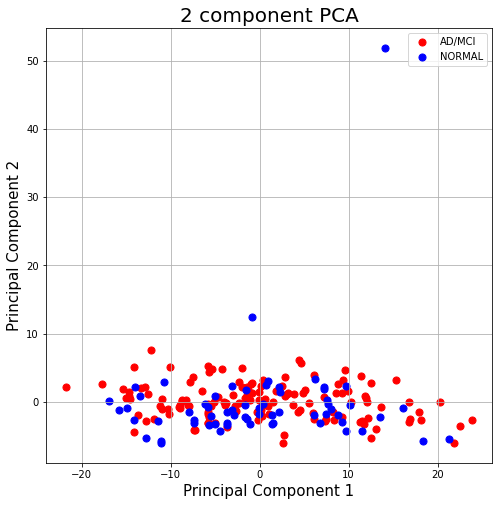

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['AD/MCI', 'NORMAL']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


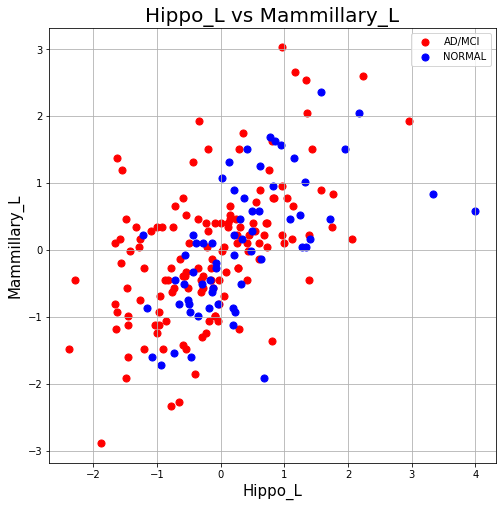

In [6]:
x = data.loc[:,['Hippo_L','Mammillary_L']].values
x = StandardScaler().fit_transform(x)

principalDf = pd.DataFrame(data = x
             , columns = ['Hippo_L','Mammillary_L'])

finalDf = pd.concat([principalDf, data[['Diagnosis']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Hippo_L', fontsize = 15)
ax.set_ylabel('Mammillary_L', fontsize = 15)
ax.set_title('Hippo_L vs Mammillary_L', fontsize = 20)
targets = ['AD/MCI', 'NORMAL']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Hippo_L']
               , finalDf.loc[indicesToKeep, 'Mammillary_L']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [7]:
df = data[data.columns.difference(['Subject_ID'])]
df= df[df.columns.difference(['Gender'])]
df= df[df.columns.difference(['Diagnosis'])]
features = list(df.columns)
x = df.loc[:, features].values
y = data.loc[:,['Diagnosis']].values
x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print("Test Accuracy: ", score)

train_predictions = logisticRegr.predict(x_train)
train_score = logisticRegr.score(x_train, y_train)
print("Train Accuracy: ", train_score)

Test Accuracy:  0.84
Train Accuracy:  1.0


/home/jmandav1/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


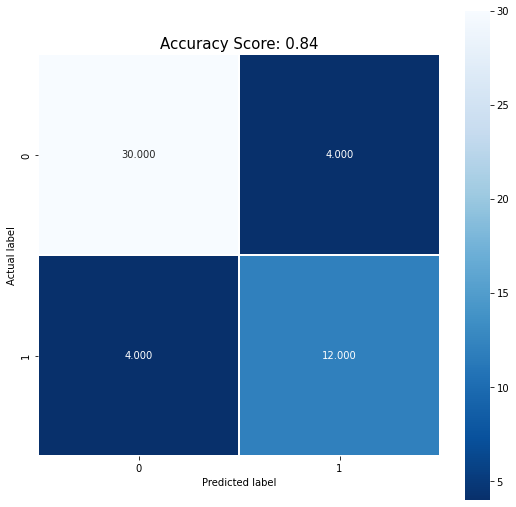

In [8]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [15]:
dat_need

df = dat_need[dat_need.columns.difference(['Subject_ID'])]
df= df[df.columns.difference(['Gender'])]
df= df[df.columns.difference(['Diagnosis'])]
features = list(df.columns)
x = df.loc[:, features].values
y = data.loc[:,['Diagnosis']].values
x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print("Test Accuracy: ", score)

train_predictions = logisticRegr.predict(x_train)
train_score = logisticRegr.score(x_train, y_train)
print("Train Accuracy: ", train_score)

Test Accuracy:  0.78
Train Accuracy:  0.7666666666666667


/home/jmandav1/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


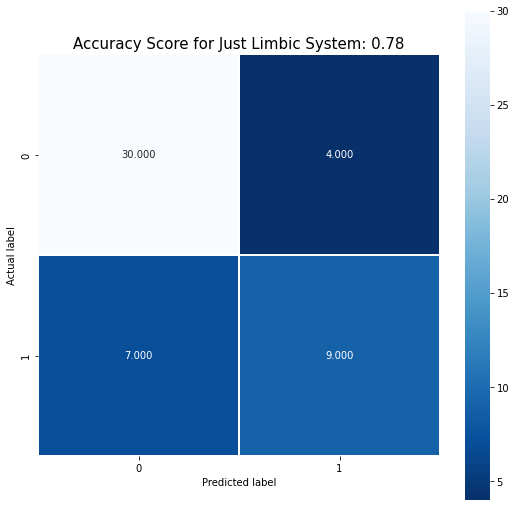

In [17]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for Just Limbic System: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Above code is written with help from tutorial on towardsdatascience.com